In [2]:
import pandas as pd

# Read csv data
dataframe = pd.read_csv('creditcard.csv')

In [52]:
#Display Data
dataframe.head()
dataframe.describe()

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.919560e-15  5.688174e-16 -8.769071e-15  2.782312e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552563e-15  2.010663e-15 -1.694249e-15 -1.927028e-16 -3.137024e-15   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

           ...                 V21           V22           V23           V24  \
count      ...        2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean       ...        1.537294e-16  7.959909e-16  5.367590e-16  4.458112e-15   
std        ...        7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min        ...       -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%        ...       -2.283949e-01 -5.423504e-01 -1.618463e-01 -3.545861e-01   
50%        ...       -2.945017e-02  6.781943e-03 -1.119293e-02  4.097606e-02   
75%        ...        1.863772e-01  5.285536e-01  1.476421e-01  4.395266e-01   
max        ...        2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28         Amount  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean   1.453003e-15  1.699104e-15 -3.660161e-16 -1.206049e-16      88.349619   
std    5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01     250.120109   
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000   
25%   -3.171451e-01 -3.269839e-01 -7.083953e-02 -5.295979e-02       5.600000   
50%    1.659350e-02 -5.213911e-02  1.342146e-03  1.124383e-02      22.000000   
75%    3.507156e-01  2.409522e-01  9.104512e-02  7.827995e-02      77.165000   
max    7.519589e+00  3.517346e+00  3.161220e+01  3.384781e+01   25691.160000   

               Class  
count  284807.000000  
mean        0.001727  
std         0.041527  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  

[8 rows x 31 columns]

In [ ]:
#The data contains 28 features and the amount of each transaction
#We need to normalise the Amount as it has a very high maximum value compared to other features
#Ignoring the time feature for now.Although it may help point out fraudulent transactions which may be closer to each other

In [39]:
#Importing Dependencies
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.preprocessing import normalize

In [26]:
#Separating Features and Targets
X = dataframe.iloc[:,1:31]
Y = dataframe.iloc[:,-1]

In [28]:
#Normalizing the features
X = normalize(X)

In [40]:
#Using SVM Classifier
model = SVC()

In [35]:
#Splitting into train and test set.Using starify to make sure class variables have same distribution in train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,stratify=Y,test_size=0.5,random_state=0)

In [46]:
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)

In [49]:
Y_score = model.decision_function(X_test)

In [47]:
print(classification_report(Y_test,Y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00    142158
          1       0.86      0.43      0.57       246

avg / total       1.00      1.00      1.00    142404



In [48]:
#Plotting Precision Recall Curve
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

(0.0, 1.0)

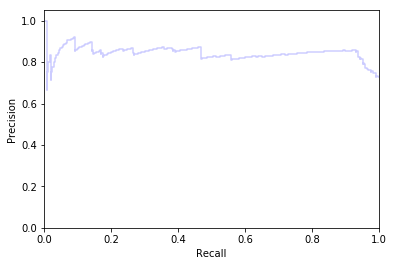

In [51]:
precision,recall,_=precision_recall_curve(Y_test,Y_score)
plt.step(recall,precision,color='b',alpha=0.2,where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])